<a href="https://colab.research.google.com/github/diecilyngonzales/Lab-Activities-for-Linear-Algebra-58051/blob/main/Midterm%20Exam/LinAlg_58051_Gonzales_MidtermsExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Gonzales, Diecilyn A.<br>
    201813779 <br>
   LinAlg 58051 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [ ]:
import pandas as pd
 
file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"
 
df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)
 
 
## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [ ]:
     ## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [ ]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0].reshape((12, 1)) ## reshape this vector to the appropriate size
costs_mat = np.array(df_prices)[1].reshape((12, 1)) ## reshape this vector to the appropriate size
flavors = list(df_sales.flavor) ## Get the list of flavors to be used in later procedures
months = list(df_sales.columns) ## Get the list of months to be used in later procedures
months.remove('flavor')

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [ ]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales.T @ price
    monthly_costs = sales.T @ cost
    monthly_profits = monthly_revenue - monthly_costs
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [ ]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [ ]:
#printing values in a readable format
month_data = {
    'Months': months, 
    'Monthly Revenue': month_rev,
    'Monthly Cost': month_cost,
    'Monthly Profit': month_profit
}
 
df_monthly = pd.DataFrame(month_data)
df_monthly

,Months,Monthly Revenue,Monthly Cost,Monthly Profit
0,1,236825,157454,79371
1,2,175530,116322,59208
2,3,159045,105195,53850
3,4,30335,20334,10001
4,5,150085,97261,52824
5,6,16735,11208,5527
6,7,17970,12372,5598
7,8,16995,11497,5498
8,9,14960,9926,5034
9,10,21590,14377,7213


## Part 2: Flavor Sales

In [ ]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = sales @ price
    flavor_costs = sales @ cost
    flavor_profits = flavor_revenue - flavor_costs 
    return flavor_profits.flatten()

In [ ]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [ ]:
#printing values of flavor profit
flavor_data = {
    'flavors': flavors,
    'Flavor Profit': flavor_profit
}

df_flavor = pd.DataFrame(flavor_data)
df_flavor

,flavors,Flavor Profit
0,red velvet,51773
1,oreo,22977
2,sugar glazed,65683
3,almond honey,20772
4,matcha,48787
5,strawberry cream,24749
6,brown sugar boba,36263
7,furits and nuts,22506
8,dark chocolate,38520
9,chocolate and orange,23036


In [ ]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
best_3_flavors = np.sort(flavor_profit)[:8:-1]
worst_3_flavors = np.sort(flavor_profit)[:3]

best_3_flavor_name = []
worst_3_flavor_name = []

#get the indeces of each of the 3 best flavor profit, and use it to acquire the flavor name with that profit
for i in range(len(best_3_flavors)):
  best_3_flavor_name.append(flavors[int(np.where(flavor_profit == best_3_flavors[i])[0])])
#get the indeces of each of the 3 worst flavor profit, and use it to acquire the flavor name with that profit
for i in range(len(best_3_flavors)):
  worst_3_flavor_name.append(flavors[int(np.where(flavor_profit == worst_3_flavors[i])[0])])

#Create a pandas DataFrame for better presentation
best_worst_data = {
    'Best Flavors': best_3_flavor_name,
    'Best Flavors\' Profit': best_3_flavors,
    'Worst Flavors': worst_3_flavor_name,
    'Worst Flavors\' Profit': worst_3_flavors
}

#Print the DataFrame to show the results
df_best_worst = pd.DataFrame(best_worst_data)
df_best_worst

,Best Flavors,Best Flavors' Profit,Worst Flavors,Worst Flavors' Profit
0,choco butter naught,84289,almond honey,20772
1,sugar glazed,65683,furits and nuts,22506
2,red velvet,51773,oreo,22977


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
 
%matplotlib inline
 
sns.set()

#### Entire Dataset

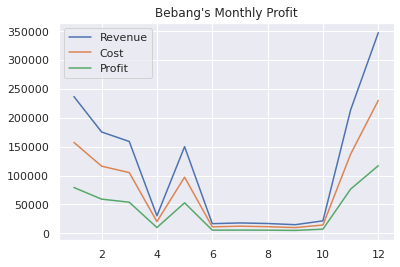

In [ ]:
plt.plot(months, month_rev)
plt.plot(months, month_cost)
plt.plot(months, month_profit)
 
plt.title("Bebang's Monthly Profit")
plt.legend(['Revenue', 'Cost', 'Profit'], loc='upper left')
 
plt.show()

#### Flavor Sales

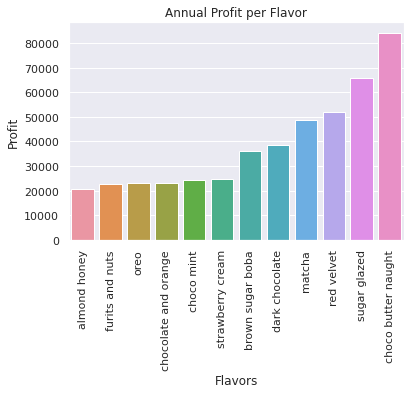

In [ ]:
Flavors = {}
Flavor_no = flavors
 
#Create a dictionary for each flavor
for i in range(len(flavor_profit)):
  Flavors[Flavor_no[i]] = flavor_profit[i]
 
#Create a dataframe using the dictionary
pd_df = pd.DataFrame(list(Flavors.items()))
pd_df.columns = ["Flavors","Profit"]
pd_df = pd_df.sort_values(['Profit']).reset_index(drop=True)
 
#Initiate the chart
ax = sns.barplot(x="Flavors", y="Profit", data=pd_df)
ax.set_xticklabels(pd_df.Flavors, rotation=90)
 
#Show chart
plt.title("Annual Profit per Flavor")
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

According to the data provided for the sales history, the behavior of the sales shows a hint of seasonality wherein the sales begins to peak after October, then go back down after the year ends until June.
 
In order to validate this hypothesis, further data may be required. But with this data, what Bebang can do is to strengthen her advertising during year ends in order to capitalize on the seasonal trends of ice cream during these months. During off-season, she can create marketing strategies which will allow her customers to get priviledged advantage during peak seasons. 
 
On the inventory of ice cream, Bebang should stock more of choco butter naught, sugar glazed, and red velvet especially during peak seasons to prepare for incoming customers. She should still stock other flavors, even the least bought flavors, in order to accommodate all types of customers; but  the amount of items to stock for each flavor will highly depend on both the sales and capital together.